In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [10]:
def godunov(wL, wR):
    # Burger's equation
    fL = wL**2 / 2
    fR = wR**2 / 2
    
    f = max(fL, fR)
    
    if (wL < wR):
        f = min(fL, fR)
    
    if (wL < 0 and wR > 0):
        f = 0
        
    return f

In [11]:
godunov(7, -5)

24.5

In [12]:
def average(wL, wR):
    return (wL + wR) / 2

In [13]:
def dwdt(t, w): # t = time, w = density of conserved quantity
    n = len(w)
    dx = 2 * np.pi / n
    
    fR = []
    for i in range(n):
        fR.append(godunov(w[i], w[(i + 1) % n]))
    
    fL = [0]
    
    for i in range(n - 1):
        fL.append(fR[i])
    fL[0] = fR[-1]
    
    ans = []
    for i in range(n):
        ans.append((fL[i] - fR[i]) / dx)
    
    return ans

In [14]:
t = np.linspace(1, 100, 100) / 100 * 2 * np.pi
w0 = np.sin(t)

length = len(t) * 0.4

final = []
for i in range(int(length)):
    a, u = odeint(dwdt, y0=w0, t=[0, t[i]], tfirst=True)
    final.append(u)

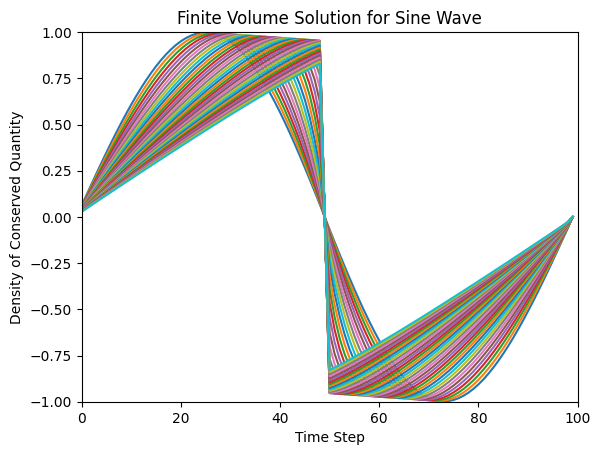

In [15]:
for i in range(int(length)):
    if i % 1 == 0:
        plt.plot(final[i])
plt.ylim(-1, 1)
plt.xlim(0, 100)
plt.title('Finite Volume Solution for Sine Wave')
plt.ylabel('Density of Conserved Quantity')
plt.xlabel('Time Step')
plt.show()

In [8]:
# The top line on the graph should be constant at 1, but it decays.
# The same is true for the bottom line: it should be constant at -1.
# This decay is caused by the fact that our solver is only first-order.
# A higher order solver would result in plots that decay much less.